# Naive Bayes, SVM e Random Forest usando vetores produzidos pelo TFIDF

## importações e carregamento do conjunto de dados

In [1]:
import pandas as pd
import numpy as np
from scipy.sparse import load_npz

from sklearn import naive_bayes
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

import optuna

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

import pickle

In [4]:
X_train = load_npz('../vectors/tfidf_lemma/X_train_tfidf_stpw.npz')
y_train = np.load('../vectors/tfidf_lemma/y_train_stpw.npy')

X_test = load_npz('../vectors/tfidf_lemma/X_test_tfidf_stpw.npz')
y_test = np.load('../vectors/tfidf_lemma/y_test_stpw.npy')

In [5]:
class_weights = dict(zip(range(len(np.unique(y_train))), 1 / np.bincount(y_train)))
labels = ['0','1','2','3']

## Naive Bayes

### Validação cruzada padrão

In [6]:
from sklearn import naive_bayes

NB_std = naive_bayes.MultinomialNB()

scores = cross_val_score(NB_std, X_train, y_train, cv=10)

print(scores)
scores.mean()

[0.45884146 0.46036585 0.45579268 0.45121951 0.44817073 0.47103659
 0.44512195 0.40396341 0.44664634 0.45121951]


0.44923780487804876

### Encontrando melhores hiperparâmetros

In [7]:
def NB_opt(trial):
    params = {
        
    }

    model = naive_bayes.MultinomialNB(**params)

    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()

    return score

In [8]:
study = optuna.create_study(direction='maximize')  # Estamos maximizando a acurácia
study.optimize(NB_opt, n_trials=50)

[I 2023-12-17 18:35:14,265] A new study created in memory with name: no-name-ca4d8475-b349-43b0-88f3-d811fb995fa5
[I 2023-12-17 18:35:14,295] Trial 0 finished with value: 0.44588414634146345 and parameters: {}. Best is trial 0 with value: 0.44588414634146345.
[I 2023-12-17 18:35:14,321] Trial 1 finished with value: 0.44588414634146345 and parameters: {}. Best is trial 0 with value: 0.44588414634146345.
[I 2023-12-17 18:35:14,347] Trial 2 finished with value: 0.44588414634146345 and parameters: {}. Best is trial 0 with value: 0.44588414634146345.
[I 2023-12-17 18:35:14,378] Trial 3 finished with value: 0.44588414634146345 and parameters: {}. Best is trial 0 with value: 0.44588414634146345.
[I 2023-12-17 18:35:14,419] Trial 4 finished with value: 0.44588414634146345 and parameters: {}. Best is trial 0 with value: 0.44588414634146345.
[I 2023-12-17 18:35:14,458] Trial 5 finished with value: 0.44588414634146345 and parameters: {}. Best is trial 0 with value: 0.44588414634146345.
[I 2023-12

### Treinando com os melhores hiperparâmetros

In [9]:
NB_bst = naive_bayes.MultinomialNB()
NB_bst.fit(X_train, y_train)

NB_y_pred = NB_bst.predict(X_test)

accuracy_score(y_test, NB_y_pred)

0.4628048780487805

### Resultados

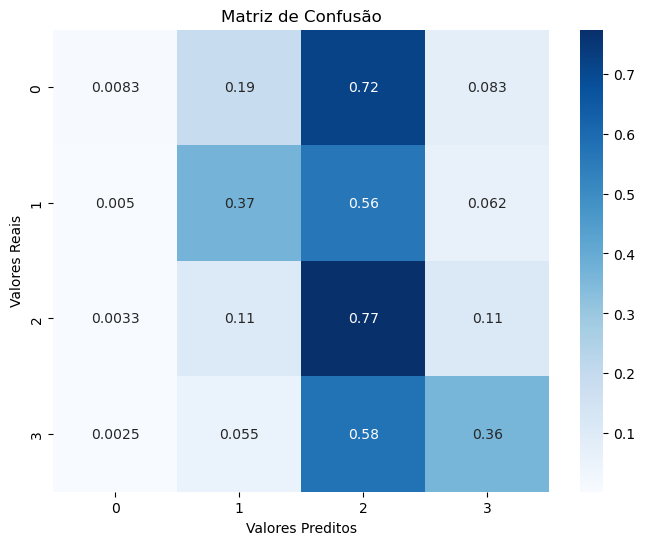

In [10]:
cm_NB = confusion_matrix(y_test, NB_y_pred)

cm_NB = cm_NB.astype('float') / cm_NB.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_NB, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

## SVM

### Validação cruzada padrão

In [11]:
from sklearn.svm import SVC

SVM_std = SVC()

scores = cross_val_score(SVM_std, X_train, y_train, cv=10)

print(scores)
scores.mean()

[0.50152439 0.51981707 0.49390244 0.51219512 0.52439024 0.49542683
 0.50152439 0.48628049 0.52439024 0.49542683]


0.5054878048780488

### Encontrando melhores hiperparâmetros

In [12]:
def SVM_opt(trial):
    # Defina os hiperparâmetros que você deseja otimizar
    C = trial.suggest_loguniform('C', 1e-5, 1e5)
    kernel = trial.suggest_categorical('kernel', ['rbf'])
    
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # Valor padrão para kernels não polinomiais
    
    if kernel in ['poly', 'rbf', 'sigmoid']:
        gamma = trial.suggest_loguniform('gamma', 1e-5, 1e5)
    else:
        gamma = 'scale'  # Valor padrão para kernel linear
    
    class_weight = trial.suggest_categorical('class_weight', [None, 'balanced'])
    
    # Construa o modelo SVM
    model = SVC(C=C, kernel=kernel, degree=degree, gamma=gamma, class_weight=class_weight)

    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()

    return score

In [13]:
study = optuna.create_study(direction='maximize')  # Estamos maximizando a acurácia
study.optimize(SVM_opt, n_trials=50)

[I 2023-12-17 18:37:54,735] A new study created in memory with name: no-name-5075414f-b902-4b57-a3d5-409fb9b65188
/tmp/ipykernel_23728/2645761510.py:3: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  C = trial.suggest_loguniform('C', 1e-5, 1e5)
/tmp/ipykernel_23728/2645761510.py:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  gamma = trial.suggest_loguniform('gamma', 1e-5, 1e5)
[I 2023-12-17 18:39:03,315] Trial 0 finished with value: 0.30015243902439026 and parameters: {'C': 3.7860892441230616e-05, 'kernel': 'rbf', 'gamma': 2.692666524820505, 'class_weight': 'balanced'}. Best is trial 0 with value: 0.30015243902439026.
/tmp/ipykernel_23728/2645761510.py:3: FutureWarning

### Treinando com os melhores hiperparâmetros

In [14]:
SVM_bst = SVC(C=120.3716763084399, kernel='rbf', degree=2, gamma=0.4788853231769602, class_weight='balanced', probability=True)
SVM_bst.fit(X_train, y_train)

SVM_y_pred = SVM_bst.predict(X_test)

accuracy_score(y_test, SVM_y_pred)

0.5085365853658537

In [15]:
from sklearn.metrics import classification_report

report = classification_report(y_test, SVM_y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.46      0.33      0.38       240
           1       0.49      0.49      0.49       400
           2       0.51      0.58      0.54       600
           3       0.55      0.53      0.54       400

    accuracy                           0.51      1640
   macro avg       0.50      0.48      0.49      1640
weighted avg       0.51      0.51      0.51      1640



### Resultados

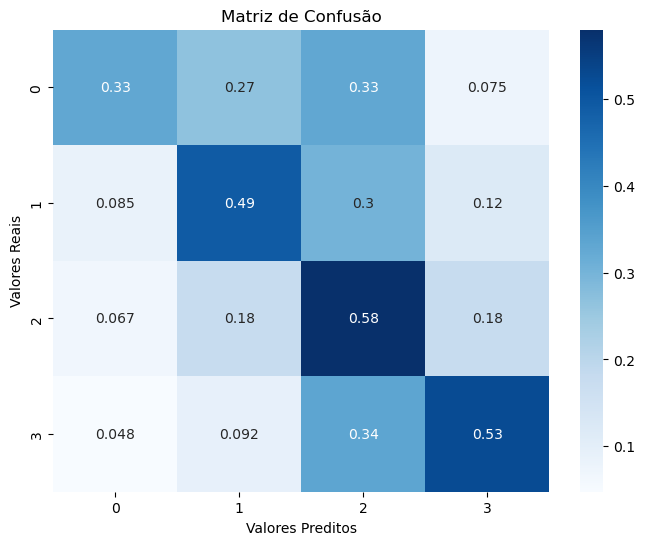

In [16]:
cm_SVM = confusion_matrix(y_test, SVM_y_pred)

cm_SVM = cm_SVM.astype('float') / cm_SVM.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_SVM, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

## Random Forest

### Validação cruzada padrão

In [17]:
from sklearn.ensemble import RandomForestClassifier

RF_std = RandomForestClassifier()

RF_scores = cross_val_score(RF_std, X_train, y_train, cv=10)

print(RF_scores)
RF_scores.mean()

[0.5        0.51981707 0.51067073 0.50762195 0.50914634 0.52286585
 0.50457317 0.49847561 0.54420732 0.49542683]


0.511280487804878

### Encontrando melhores hiperparâmetros

In [18]:
def RF_opt(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 50, 200),
        'class_weight': class_weights,
    }

    model = RandomForestClassifier(**params)

    score = cross_val_score(model, X_train, y_train, scoring='accuracy', cv=5).mean()

    return score

In [19]:
study = optuna.create_study(direction='maximize')  # Estamos maximizando a acurácia
study.optimize(RF_opt, n_trials=50)

[I 2023-12-17 19:39:46,785] A new study created in memory with name: no-name-8641aa8c-ce55-473d-91d9-37b0c687c6f1
[I 2023-12-17 19:40:21,964] Trial 0 finished with value: 0.49984756097560973 and parameters: {'n_estimators': 128, 'max_depth': 200}. Best is trial 0 with value: 0.49984756097560973.
[I 2023-12-17 19:40:42,763] Trial 1 finished with value: 0.5038109756097561 and parameters: {'n_estimators': 102, 'max_depth': 72}. Best is trial 1 with value: 0.5038109756097561.
[I 2023-12-17 19:41:27,855] Trial 2 finished with value: 0.5047256097560975 and parameters: {'n_estimators': 161, 'max_depth': 188}. Best is trial 2 with value: 0.5047256097560975.
[I 2023-12-17 19:42:12,062] Trial 3 finished with value: 0.5088414634146341 and parameters: {'n_estimators': 193, 'max_depth': 86}. Best is trial 3 with value: 0.5088414634146341.
[I 2023-12-17 19:42:58,935] Trial 4 finished with value: 0.5051829268292684 and parameters: {'n_estimators': 183, 'max_depth': 126}. Best is trial 3 with value: 0

### Treinando com os melhores hiperparâmetros

In [20]:
RF_bst = RandomForestClassifier(n_estimators=167, max_depth=176, class_weight=class_weights)
RF_bst.fit(X_train, y_train)

RF_y_pred = RF_bst.predict(X_test)

accuracy_score(y_test, RF_y_pred)

0.5231707317073171

### Resultados

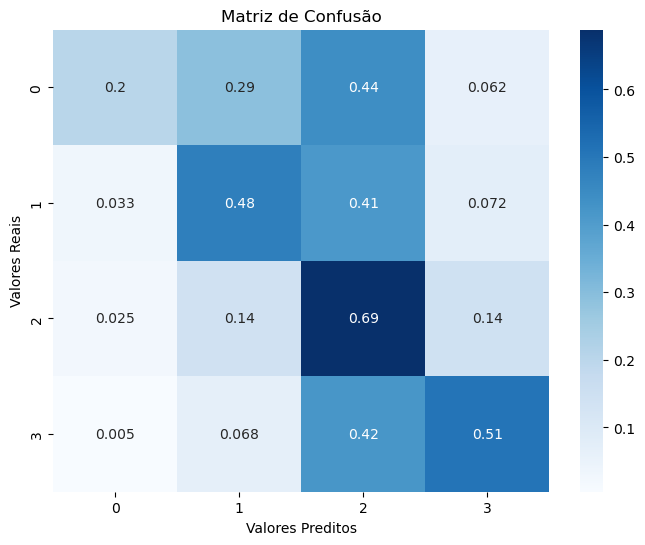

In [21]:
cm_RF = confusion_matrix(y_test, RF_y_pred)

cm_RF = cm_RF.astype('float') / cm_RF.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_RF, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title('Matriz de Confusão')
plt.xlabel('Valores Preditos')
plt.ylabel('Valores Reais')
plt.show()

## Comparando os três modelos

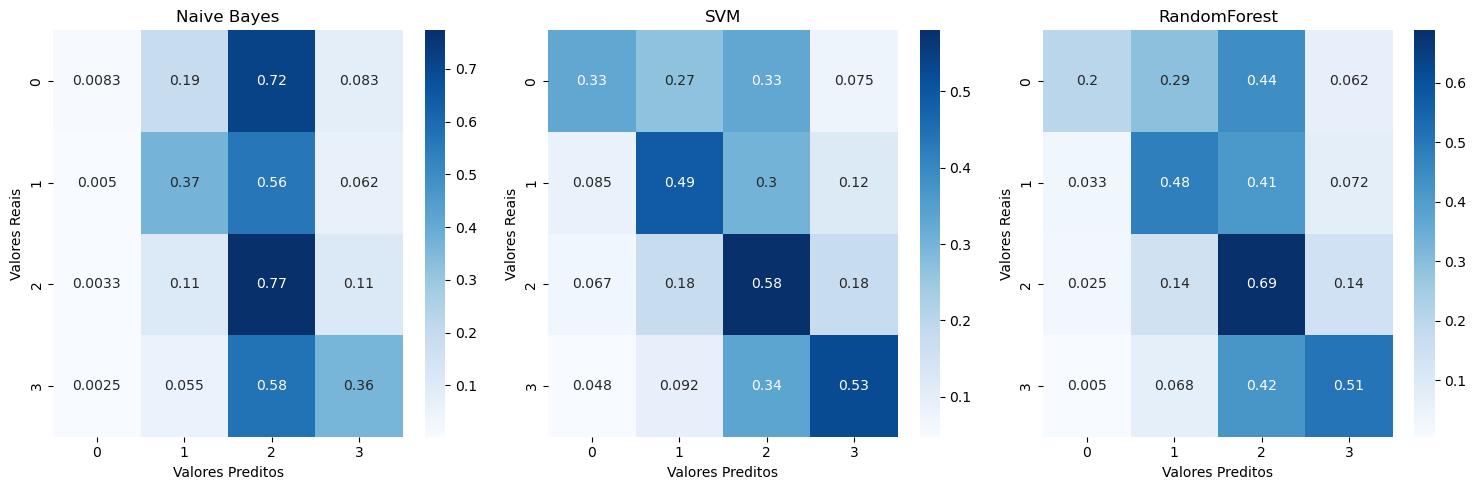

In [22]:
# Configurar subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plotar cada matriz de confusão em um subplot
for i, (cm, model_name) in enumerate(zip([cm_NB, cm_SVM, cm_RF], ['Naive Bayes', 'SVM', 'RandomForest'])):
    sns.heatmap(cm, annot=True, cmap="Blues", xticklabels=labels, yticklabels=labels, ax=axes[i])
    axes[i].set_title(f'{model_name}')
    axes[i].set_xlabel('Valores Preditos')
    axes[i].set_ylabel('Valores Reais')

plt.tight_layout()
plt.show()

## Armazenando modelos treinados

In [23]:
with open('../models_dump/NB_CV43_T43_stpw.pkl', 'wb') as file:
    pickle.dump(NB_bst, file)

with open('../models_dump/SVM_CV50_T50_stpw.pkl', 'wb') as file:
    pickle.dump(SVM_bst, file)

with open('../models_dump/RF_CV51_T51_stpw.pkl', 'wb') as file:
    pickle.dump(RF_bst, file)